# Data Science Project Notebook

In [0]:
# Data wrangling libraries.
import pandas as pd
import numpy as np

In [0]:
# Other libraries
import math

In [0]:
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.cubehelix_palette(8, start=2))
from mpl_toolkits import mplot3d
from matplotlib.pyplot import cm

In [134]:
url_income = 'https://raw.githubusercontent.com/urehani1/491/master/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2007-2016.csv'
df_income = pd.read_csv(url_income)
print('File loaded')
display(df_income.head())

File loaded


,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,2018-08-02T00:00:00.000,2014,824,2380,2647,1798,2261,6251,2996,3125,...,4924,2223,1447,5287,2958,3891,4308,2953,2234,3253
1,2018-08-02T00:00:00.000,2010,833,2826,2311,1414,2006,5064,2965,3703,...,4582,2710,1609,5181,2747,5070,3948,3327,3097,3507
2,2018-08-02T00:00:00.000,2013,693,2773,2352,1071,1944,5241,3787,3280,...,3753,1836,1380,4946,3399,5169,5176,2999,3167,3420
3,2018-08-02T00:00:00.000,2011,760,2693,3430,1536,1728,4369,4213,3709,...,4603,2758,1911,6363,3426,2717,4929,2928,3582,4653
4,2018-08-02T00:00:00.000,2007,695,2604,1651,871,1042,5845,4311,4540,...,3934,2066,2240,3760,3244,4573,3963,3313,2961,4322


In [135]:
df_income=df_income.drop(columns=['Date created'])
df_income = df_income.drop(df_income[df_income.MARYLAND < 1000].index)
df_income.head(15)

,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,Cecil County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
6,2013,72482,39994,85685,41988,64624,91993,46015,82073,64880,...,55695,97873,71682,80143,36106,78274,57525,55643,47536,52276
7,2008,70482,39055,82616,40087,63078,82033,54934,78348,66131,...,52934,93895,71696,77686,39426,77703,62206,51587,48614,50347
11,2012,71169,38670,87083,39077,62413,87215,48772,79304,62443,...,49969,94365,69258,79012,34454,85478,61529,52604,50204,55875
12,2015,75784,39859,90825,43192,68317,98937,51294,84506,68972,...,52274,98314,76366,83914,38692,83148,62018,55270,52153,53366
13,2010,68933,37083,80908,38186,62300,86536,55480,80291,61506,...,49017,88559,69524,78503,38134,81559,56806,51610,47702,55492
14,2016,78787,44708,95297,46604,72305,97188,49616,89529,70504,...,54210,99604,78680,79966,38546,80049,62264,54643,50015,53509
15,2007,67989,37171,80158,36894,60828,89159,48387,79803,62489,...,46693,91440,67706,75902,35553,72534,56512,50257,49981,49067
16,2011,70075,38504,82980,38478,62309,88406,50809,82553,61191,...,49795,92288,70114,75158,35426,80943,55145,52028,45788,48472
17,2009,69193,37151,79843,38458,64629,86281,49050,78418,60543,...,50585,93774,69545,75146,35621,71316,59633,48883,46404,47829
18,2014,73851,39808,86654,41895,67766,92446,49573,84500,62198,...,53288,97279,71904,80650,38376,84686,54836,54606,51927,55691


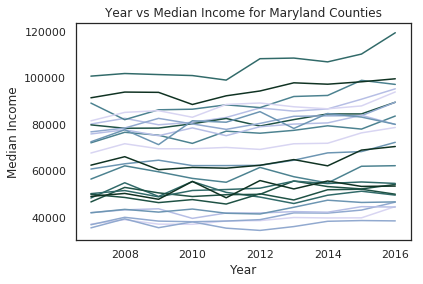

In [136]:
#counties = []
counties = list(df_income)
counties = counties[2:]
#print(counties)
color=iter(cm.rainbow(np.linspace(0,1,1)))
c=next(color)
for x in counties:
    x, y = zip(*sorted(zip(df_income['Year'], df_income[x])))
    plt.plot(x,y,label = 'dd')
plt.title('Year vs Median Income for Maryland Counties')
plt.xlabel('Year')
plt.ylabel('Median Income')
#plt.plot(x,y)
plt.show()

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df_income[['Year']]
df_pred_income = pd.DataFrame(columns=['County', 'Income_2017', 'Income_2018', 'Income_2019'])
for i in list(df_income.columns)[2:]:
  #print(type(i))
  y = df_income[[i]]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  income = regression_model.predict([[2017]])
  income2 = regression_model.predict([[2018]])
  income3 = regression_model.predict([[2019]])
  #print(i,income[0][0],income2[0][0],income3[0][0])
  df_pred_income = df_pred_income.append({
      'County': i,
      'Income_2017': int(income[0][0]),
      'Income_2018': int(income2[0][0]),
      'Income_2019': int(income3[0][0])
  }, ignore_index=True)
  
# url_newincome = 'https://raw.githubusercontent.com/urehani1/491/master/maryland_income19.csv'
# df_newincome = pd.read_csv(url_newincome)
# df_newincome.head(15)
df_pred_income[['Income_2017', 'Income_2018', 'Income_2019']] = df_pred_income[['Income_2017', 'Income_2018', 'Income_2019']].astype(int)
df_pred_income.head()

,County,Income_2017,Income_2018,Income_2019
0,Allegany County,42977,43596,44216
1,Anne Arundel County,94512,96174,97835
2,Baltimore City,45677,46519,47361
3,Baltimore County,70712,71679,72646
4,Calvert County,100630,102595,104560


In [0]:
df_nces = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/ncesdata_md.csv')

In [0]:
df_fafsa = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/MD.csv')

In [140]:
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,Aberdeen High,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,Academy for College and Career Exploration,Baltimore City Public Schools,Baltimore city,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,Academy of Health Sciences at PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,Achievement Academy @ Harbor City High,Baltimore City Public Schools,Baltimore city,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,Albert Einstein High,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [141]:
df_fafsa.head()

,Name,City,State,Applications_1920_Submitted_Apr19_2019,Applications_1920_Complete_Apr19_2019,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018
0,ABERDEEN HIGH,ABERDEEN,MD,169,160,139,131,175,162,206,192
1,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,BALTIMORE,MD,49,42,45,42,47,46,53,50
2,ACADEMY OF HEALTH SCIENCES AT PGCC,LARGO,MD,82,79,78,77,78,78,82,80
3,ACADEMY OF THE HOLY CROSS,KENSINGTON,MD,91,91,80,77,83,81,84,82
4,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,BALTIMORE,MD,36,22,34,18,37,22,48,31


In [142]:
# Convert all the school names to uppercase.
df_nces['School Name'] = df_nces['School Name'].apply(lambda x: x.upper())
# Convert Baltimore city to Baltimore City so it will merge properly.
df_nces['County Name*'] = df_nces['County Name*'].replace({'Baltimore city': 'Baltimore City'})
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,Baltimore City Public Schools,Baltimore City,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,ACADEMY OF HEALTH SCIENCES AT PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,Baltimore City Public Schools,Baltimore City,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,ALBERT EINSTEIN HIGH,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [143]:
df_joined = df_nces.merge(df_fafsa, left_on="School Name", right_on="Name")
df_joined = df_joined.merge(df_pred_income, left_on="County Name*", right_on="County")
df_joined.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018,County,Income_2017,Income_2018,Income_2019
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,139,131,175,162,206,192,Harford County,81495,82190,82885
1,240039000683,MD-12-120373,2400390,MD-12,9,12,BEL AIR HIGH,Harford County Public Schools,Harford County,100 Heighe St,...,202,195,220,214,252,245,Harford County,81495,82190,82885
2,240039001380,MD-12-120385,2400390,MD-12,9,12,C. MILTON WRIGHT HIGH,Harford County Public Schools,Harford County,1301 N Fountain Green Rd,...,223,211,241,231,257,249,Harford County,81495,82190,82885
3,240039000480,MD-12-120292,2400390,MD-12,7,12,CENTER FOR EDUCATIONAL OPPORTUNITY,Harford County Public Schools,Harford County,253 Paradise Rd,...,5,<5,5,<5,5,5,Harford County,81495,82190,82885
4,240039000690,MD-12-120176,2400390,MD-12,9,12,EDGEWOOD HIGH,Harford County Public Schools,Harford County,2415 Willoughby Beach Rd,...,153,129,166,136,194,166,Harford County,81495,82190,82885


In [144]:
df_joined.columns.tolist()

['NCES School ID',
 'State School ID',
 'NCES District ID',
 'State District ID',
 'Low Grade*',
 'High Grade*',
 'School Name',
 'District',
 'County Name*',
 'Street Address',
 'City_x',
 'State_x',
 'ZIP',
 'ZIP 4-digit',
 'Phone',
 'Locale Code*',
 'Locale*',
 'Charter',
 'Magnet*',
 'Title I School*',
 'Title 1 School Wide*',
 'Students*',
 'Teachers*',
 'Student Teacher Ratio*',
 'Free Lunch*',
 'Reduced Lunch*',
 'Name',
 'City_y',
 'State_y',
 'Applications_1920_Submitted_Apr19_2019',
 'Applications_1920_Complete_Apr19_2019',
 'Applications_1819_Submitted_Apr19_2018',
 'Applications_1819_Complete_Apr19_2018',
 'Applications_1819_Submitted_Jun_2018',
 'Applications_1819_Complete_Jun_2018',
 'Applications_1819_Submitted_Dec_2018',
 'Applications_1819_Complete_Dec_2018',
 'County',
 'Income_2017',
 'Income_2018',
 'Income_2019']

In [0]:
# Get rid of any <5 values in Applications by replacing it with 0.
df_joined['Applications_1920_Submitted_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Submitted_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1920_Complete_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Complete_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [0]:
df_joined['Students'] = pd.to_numeric(df_joined['Students*'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Teachers'] = pd.to_numeric(df_joined['Teachers*'].astype(str).str.replace(',',''), errors='coerce').fillna(0)
df_joined['Student_Teacher_Ratio'] = pd.to_numeric(df_joined['Student Teacher Ratio*'].astype(str).str.replace(',',''), errors='coerce').fillna(0)


In [0]:
df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Applications_1920_Submitted_Apr19_2019']
df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Applications_1819_Submitted_Apr19_2018']
df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'] = df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'] = df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Students']
df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Submitted_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Submitted_Apr19_2018'] / df_joined['Students']
df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['City'] = df_joined['City_x']
df_joined['State'] = df_joined['State_x']
df_joined.drop('County Name*', axis=1, inplace=True)
df_joined.drop('City_x', axis=1, inplace=True)
df_joined.drop('City_y', axis=1, inplace=True)
df_joined.drop('State_x', axis=1, inplace=True)
df_joined.drop('State_y', axis=1, inplace=True)
df_joined.drop('Name', axis=1, inplace=True)
df_joined.drop('Students*', axis=1, inplace=True)
df_joined.drop('Teachers*', axis=1, inplace=True)
df_joined.drop('Student Teacher Ratio*', axis=1, inplace=True)

In [0]:
df_joined.rename(columns={
    'Low Grade*': 'Low_Grade',
    'High Grade*': 'High_Grade',
    'Locale Code*': 'Locale_Code',
    'Locale*': 'Locale',
    'Magnet*': 'Magnet',
    'Title I School*': 'Title_I_School',
    'Title 1 School Wide*': 'Title_1_School_Wide',
    'Free Lunch*': 'Free_Lunch',
    'Reduced Lunch*': 'Reduced_Lunch'
}, inplace=True)

In [0]:
df_joined['High_Grade'] = df_joined['High_Grade'].astype('int8')
df_joined['Low_Grade'] = df_joined['Low_Grade'].astype('int8')
df_joined['Grades'] = df_joined['High_Grade'] - df_joined['Low_Grade']

## Checking Values

We want to check the possible unique values of all the categorical variables so we can get a better idea of the data structure.

First up is Free Lunch and Reduced Lunch, according to the data download, `–` means that data was missing and `†` means that data didn't meet the quality standards. If all we have in a column is missing data and zeros, we likely are not going to get any meaningful information from that column.

In [153]:
print(df_joined['Free_Lunch'].unique())
print(df_joined['Reduced_Lunch'].unique())
print(df_joined['State'].unique())

['–' '0']
['–' '0']
['MD']


In [0]:
# Since all that's in the Free_Lunch and Reduced_Lunch columns is '-' and 0, we'll just drop them.
df_joined.drop('Free_Lunch', axis=1, inplace=True)
df_joined.drop('Reduced_Lunch', axis=1, inplace=True)
df_joined.drop('State', axis=1, inplace=True)

In [155]:
print(df_joined['City'].unique())
print(df_joined['County'].unique())
print(df_joined['Magnet'].unique())
print(df_joined['Charter'].unique())
print(df_joined['Locale'].unique())
print(df_joined['Locale_Code'].unique())
print(df_joined['Title_I_School'].unique())
print(df_joined['Title_1_School_Wide'].unique())
print(df_joined['Grades'].unique())

['Aberdeen' 'Bel Air' 'Edgewood' 'Fallston' 'Havre de Grace' 'Joppa'
 'Pylesville' 'Baltimore' 'Largo' 'Bladensburg' 'Bowie' 'Capitol Heights'
 'Springdale' 'Laurel' 'Cheltenham' 'Temple Hills' 'Upper Marlboro'
 'Lanham' 'Greenbelt' 'Landover' 'Fort Washington' 'Brandywine'
 'Beltsville' 'Hyattsville' 'Oxon Hill' 'Riverdale' 'Forestville'
 'Clinton' 'Kensington' 'Bethesda' 'Clarksburg' 'Rockville' 'Damascus'
 'Gaithersburg' 'Silver Spring' 'Germantown' 'Burtonsville' 'Poolesville'
 'Sandy Spring' 'Potomac' 'Cumberland' 'Cresaptown' 'Frostburg'
 'Annapolis' 'Gambrills' 'Pasadena' 'Hanover' 'Glen Burnie' 'Ft Meade'
 'Millersville' 'Severna Park' 'Edgewater' 'Harwood' 'Columbia'
 'Ellicott City' 'Glenelg' 'Marriottsville' 'Fulton' 'Clarksville'
 'Hagerstown' 'Boonsboro' 'Clear Spring' 'Hancock' 'Smithsburg'
 'Williamsport' 'Chesapeake City' 'Elkton' 'North East' 'Perryville'
 'Brunswick' 'Thurmont' 'Frederick' 'Middletown' 'Ijamsville'
 'Walkersville' 'Prince Frederick' 'Huntingtown' 'Owi

## Graphs of Predictor Variables

Lets do some neat count graphs to see the spread of certain categories!

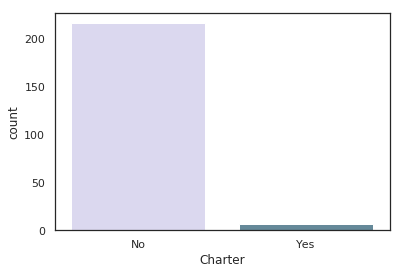

In [156]:
ax_charter = sns.countplot(x='Charter', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

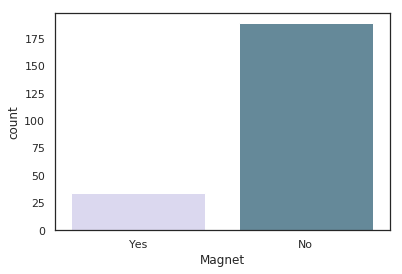

In [157]:
ax_magnet = sns.countplot(x='Magnet', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

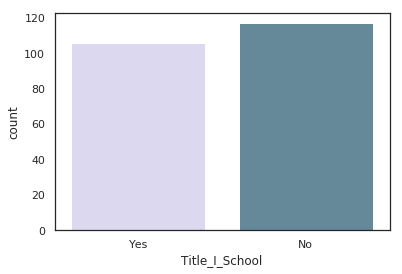

In [158]:
ax_title_I_school = sns.countplot(x='Title_I_School', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

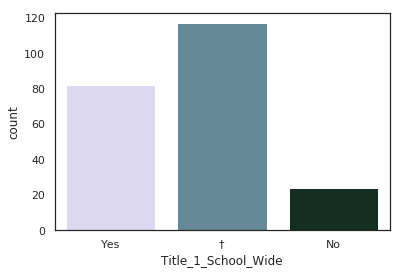

In [159]:
ax_title_1_school_wide = sns.countplot(x='Title_1_School_Wide', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

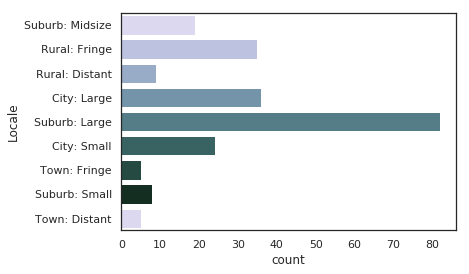

In [160]:
ax_locale = sns.countplot(y='Locale', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

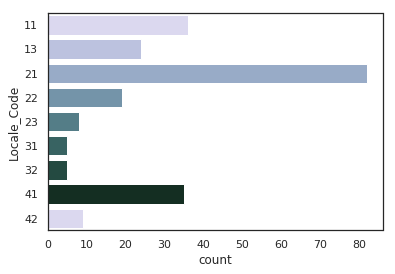

In [161]:
ax_locale_code = sns.countplot(y='Locale_Code', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

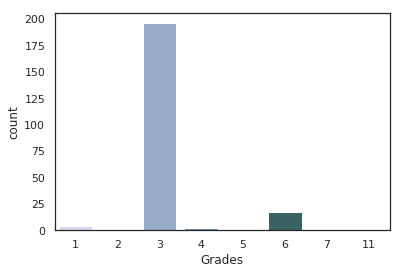

In [162]:
ax_grades = sns.countplot(x='Grades', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

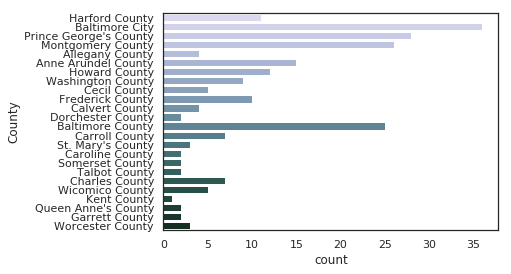

In [163]:
ax_county = sns.countplot(y='County', data=df_joined, palette=sns.cubehelix_palette(24, start=2))

## Checking Correlation for Similar Columns



In [0]:
df_joined['Locale_Code_Coded'] = df_joined['Locale_Code'].astype('category').cat.codes
df_joined['Locale_Coded'] = df_joined['Locale'].astype('category').cat.codes

In [165]:
# Checking the correlation between Locale category and Locale Code
print(df_joined.corr()['Locale_Coded']['Locale_Code_Coded'])

0.39675464201624266


In [0]:
df_joined.drop('Locale_Coded', axis=1, inplace=True)
df_joined.drop('Locale_Code_Coded', axis=1, inplace=True)

Looks like `Locale_Code` isn't just a duplicate of `Locale`, so they both get to stay in! For the actual analysis though, I'll have to one hot encode them.

Lets do that now (one-hot encode all the categorical variables)! I do plan on label encoding "Yes" to 1 and "No" to 0 for the ones that are only Yes and No, and don't have any missing data.

## Encoding Categories

This is important because typically categories aren't able to be processed rawly by most algorithms and techniques, so we need to convert them to a numerical value.

### Label Encoding

First lets encode the Yes and No categories as int8, which can be properly processed by machine learning algorithms.

In [167]:
df_joined['Charter'] = df_joined['Charter'].map({'Yes': 1, 'No': 0}).astype('int8')
df_joined['Magnet'] = df_joined['Magnet'].map({'Yes': 1, 'No': 0}).astype('int8')
df_joined['Title_I_School'] = df_joined['Title_I_School'].map({'Yes': 1, 'No': 0}).astype('int8')
print(df_joined['Charter'].unique())
print(df_joined['Magnet'].unique())
print(df_joined['Title_I_School'].unique())

[0 1]
[1 0]
[1 0]


Nice! That worked out nicely. Now lets move on to the other categories.


### One-Hot Encoding

One-hot encoding converts each category to a 1 or 0 in its own column. Very useful for machine learning and data science techniques as it converts categories without possibly losing information like you can in label encoding with n > 2.

In [0]:
df_joined['Locale_Code'] = df_joined['Locale_Code'].astype('category')
df_joined['ZIP'] = df_joined['ZIP'].astype('category')
df_joined['City'] = df_joined['City'].astype('category')
df_joined['District'] = df_joined['District'].astype('category')
df_joined['County'] = df_joined['County'].astype('category')
df_joined = df_joined.join(pd.get_dummies(df_joined[['Title_1_School_Wide', 'Locale', 'Locale_Code', 'ZIP', 'City', 'District', 'County']]))

In [169]:

print(df_joined.columns.tolist())

['NCES School ID', 'State School ID', 'NCES District ID', 'State District ID', 'Low_Grade', 'High_Grade', 'School Name', 'District', 'Street Address', 'ZIP', 'ZIP 4-digit', 'Phone', 'Locale_Code', 'Locale', 'Charter', 'Magnet', 'Title_I_School', 'Title_1_School_Wide', 'Applications_1920_Submitted_Apr19_2019', 'Applications_1920_Complete_Apr19_2019', 'Applications_1819_Submitted_Apr19_2018', 'Applications_1819_Complete_Apr19_2018', 'Applications_1819_Submitted_Jun_2018', 'Applications_1819_Complete_Jun_2018', 'Applications_1819_Submitted_Dec_2018', 'Applications_1819_Complete_Dec_2018', 'County', 'Income_2017', 'Income_2018', 'Income_2019', 'Students', 'Teachers', 'Student_Teacher_Ratio', 'Applications_1920_Completed_Submitted_Perc_Apr19_2019', 'Applications_1819_Completed_Submitted_Perc_Apr19_2018', 'Applications_1920_Complete_Students_Perc_Apr19_2019', 'Applications_1819_Complete_Students_Perc_Apr19_2018', 'Applications_1920_Submitted_Students_Perc_Apr19_2019', 'Applications_1819_Subm

That's a lot of columns, but we need to delete all the columns we're not going to use in our analysis like the school ids and school codes.

In [0]:
# Drop all the ones we one-hot encoded
df_joined.drop('Title_1_School_Wide', axis=1, inplace=True)
df_joined.drop('Locale', axis=1, inplace=True)
df_joined.drop('Locale_Code', axis=1, inplace=True)
df_joined.drop('ZIP', axis=1, inplace=True)
df_joined.drop('City', axis=1, inplace=True)
df_joined.drop('District', axis=1, inplace=True)
df_joined.drop('County', axis=1, inplace=True)

In [0]:
# Drop all the unneccessary columns.
df_joined.drop('Phone', axis=1, inplace=True)
df_joined.drop('ZIP 4-digit', axis=1, inplace=True)
df_joined.drop('Street Address', axis=1, inplace=True)
df_joined.drop('School Name', axis=1, inplace=True)
df_joined.drop('NCES School ID', axis=1, inplace=True)
df_joined.drop('State School ID', axis=1, inplace=True)
df_joined.drop('NCES District ID', axis=1, inplace=True)
df_joined.drop('State District ID', axis=1, inplace=True)

In [0]:
def pretty_density_plot(titles, texta=(1, "right")):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    
    df_temp = df_joined[titles]

    df_temp = pd.melt(df_temp, id_vars=[], var_name='Year', value_name="Students")
    
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(len(titles), start=2)
    g = sns.FacetGrid(df_temp, row="Year", hue="Year", aspect=15, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "Students", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, "Students", clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(texta[0], .2, label.replace('_', ' '), fontweight="bold", color=color,
            ha=texta[1], va="center", transform=ax.transAxes)
    
    g.map(label, "Students")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

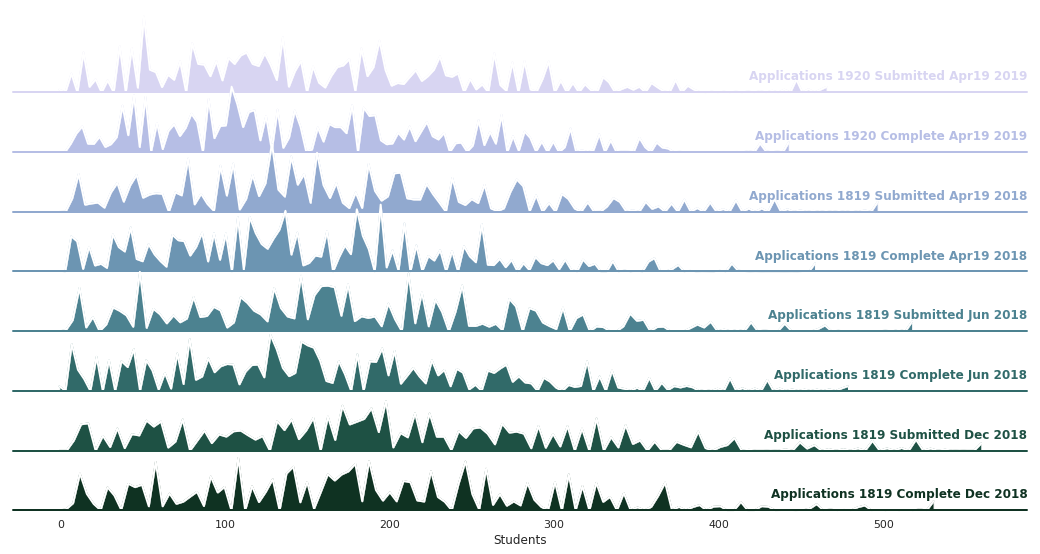

In [173]:
raw_cols = ['Applications_1920_Submitted_Apr19_2019',
            'Applications_1920_Complete_Apr19_2019',
            'Applications_1819_Submitted_Apr19_2018',
            'Applications_1819_Complete_Apr19_2018',
            'Applications_1819_Submitted_Jun_2018',
            'Applications_1819_Complete_Jun_2018',
            'Applications_1819_Submitted_Dec_2018',
            'Applications_1819_Complete_Dec_2018']
pretty_density_plot(raw_cols, (1, "right"))

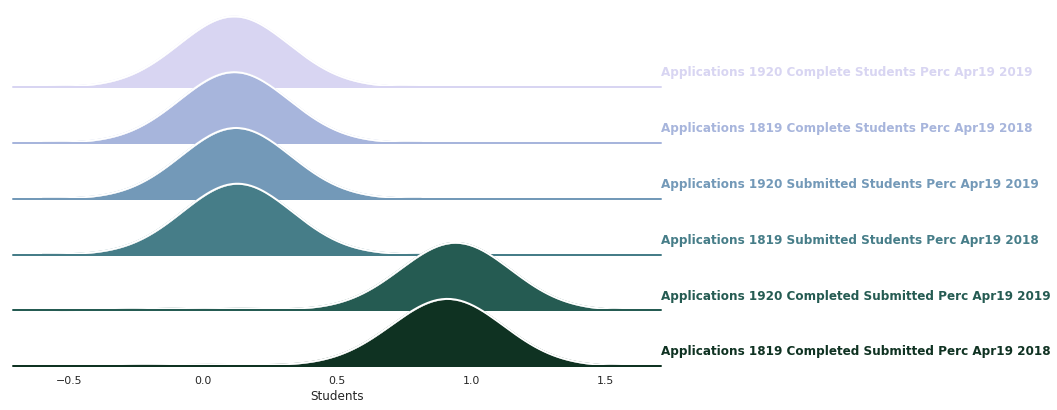

In [174]:
perc_cols =  ['Applications_1920_Complete_Students_Perc_Apr19_2019',
              'Applications_1819_Complete_Students_Perc_Apr19_2018',
              'Applications_1920_Submitted_Students_Perc_Apr19_2019',
              'Applications_1819_Submitted_Students_Perc_Apr19_2018',
             'Applications_1920_Completed_Submitted_Perc_Apr19_2019',
              'Applications_1819_Completed_Submitted_Perc_Apr19_2018']
pretty_density_plot(perc_cols, (1, "left"))

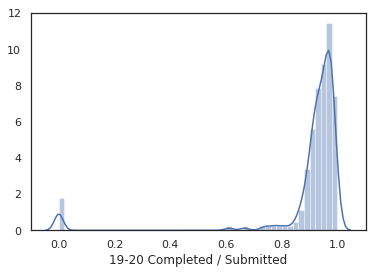

In [175]:
ax_completed_2019 = sns.distplot(df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'], axlabel="19-20 Completed / Submitted")

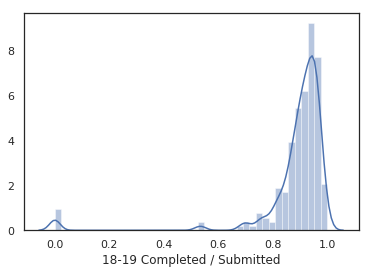

In [176]:
ax_completed_2018 = sns.distplot(df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'], axlabel="18-19 Completed / Submitted")

## Data Descriptions

Lets get some basic statisics about the data so we can put that in our analysis.

In [177]:
df_joined[raw_cols].describe()

,Applications_1920_Submitted_Apr19_2019,Applications_1920_Complete_Apr19_2019,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,149.757848,142.237668,155.775785,143.076233,167.188341,153.856502,188.004484,175.390135
std,94.614222,91.516267,95.612270,90.243557,100.601481,94.887591,110.647785,104.801981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.500000,73.500000,83.500000,75.500000,92.000000,80.500000,105.500000,95.500000
50%,134.000000,126.000000,143.000000,133.000000,160.000000,147.000000,184.000000,172.000000
75%,214.000000,200.500000,212.000000,195.500000,229.000000,213.500000,258.000000,244.500000
max,465.000000,442.000000,496.000000,458.000000,517.000000,478.000000,559.000000,530.000000


In [178]:
df_joined[perc_cols].describe()

,Applications_1920_Complete_Students_Perc_Apr19_2019,Applications_1819_Complete_Students_Perc_Apr19_2018,Applications_1920_Submitted_Students_Perc_Apr19_2019,Applications_1819_Submitted_Students_Perc_Apr19_2018,Applications_1920_Completed_Submitted_Perc_Apr19_2019,Applications_1819_Completed_Submitted_Perc_Apr19_2018
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.114366,0.115254,0.121558,0.126914,0.904644,0.885486
std,0.042031,0.040626,0.040843,0.039848,0.182357,0.150688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091021,0.091294,0.098464,0.102305,0.915466,0.877690
50%,0.116360,0.118255,0.124521,0.129955,0.946809,0.920635
75%,0.142247,0.141744,0.147608,0.151178,0.973534,0.950857
max,0.209890,0.216355,0.213187,0.232453,1.000000,1.000000


In [187]:
predictor_cols = df_joined.columns.difference(perc_cols+raw_cols)
print(predictor_cols)

Index(['Charter', 'City_Aberdeen', 'City_Accident', 'City_Annapolis',
       'City_Baltimore', 'City_Bel Air', 'City_Beltsville', 'City_Berlin',
       'City_Bethesda', 'City_Bladensburg',
       ...
       'ZIP_21811', 'ZIP_21817', 'ZIP_21837', 'ZIP_21851', 'ZIP_21853',
       'ZIP_21863', 'ZIP_21901', 'ZIP_21903', 'ZIP_21915', 'ZIP_21921'],
      dtype='object', length=358)


## Now for Some Machine Learning

I'm first going to try applying a LightGBM model to the dataset, as I'll then be able to get feature importances so I can remove not useful ones. LightGBM is also fairly fast for how powerful it is, so I should be able to train it fairly quickly.

First, I'm going to setup some handy functions to do it for us.

In [0]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [0]:
# Taken from: https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py
def lightgbm_train_and_predict(X_train, X_test, y_train, y_test):
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # specify your configurations as a dict
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'l2', 'l1'},
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0
    }
#     gbm = lgb.LGBMModel(params,
#                 lgb_train,
#                 num_boost_round=1000,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=100)
    print('Starting training...')
    # train
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100, verbose_eval=10)

    print('Saving model...')
    # save model to file
    gbm.save_model('model.txt')

    print('Starting predicting...')
    # predict
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    # eval
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    print('The rmse of prediction is:', rmse)
    return gbm, rmse

In [0]:
rmse_for_target = {}
def split_and_train(target, predictors=predictor_cols):
    X_train, X_test, y_train, y_test = train_test_split(df_joined[predictors], df_joined[target], test_size=0.33, random_state=1337)
    print("Split done, calling trainer")
    model, rmse = lightgbm_train_and_predict(X_train, X_test, y_train, y_test)
    print("Done! Printing feature importances...")
    rmse_for_target[target] = rmse
    feat_importances = pd.Series(model.feature_importance(), index=predictors)
    feat_importances.nlargest(15).plot(kind='barh')
    return rmse

Now we need to actually do the training, we'll do the training with all values, then we'll try only taking the most important of each and train again.

### Percentages

#### First Iteration

In [0]:
RMSE_full_features_percentage = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0291636	valid_0's l2: 0.00148033
[20]	valid_0's l1: 0.0278447	valid_0's l2: 0.00135021
[30]	valid_0's l1: 0.0273297	valid_0's l2: 0.00130118
[40]	valid_0's l1: 0.0271176	valid_0's l2: 0.00128164
[50]	valid_0's l1: 0.0271312	valid_0's l2: 0.00128309
[60]	valid_0's l1: 0.0272492	valid_0's l2: 0.00128948
[70]	valid_0's l1: 0.027482	valid_0's l2: 0.00130788
[80]	valid_0's l1: 0.0275249	valid_0's l2: 0.00130823
[90]	valid_0's l1: 0.0277225	valid_0's l2: 0.00132732
[100]	valid_0's l1: 0.0280763	valid_0's l2: 0.00134514
[110]	valid_0's l1: 0.0279316	valid_0's l2: 0.0013296
[120]	valid_0's l1: 0.0282843	valid_0's l2: 0.00134283
[130]	valid_0's l1: 0.0282616	valid_0's l2: 0.00133978
[140]	valid_0's l1: 0.0283736	valid_0's l2: 0.00135315
Early stopping, best iteration is:
[41]	valid_0's l1: 0.0271224	valid_0's l2: 0.00128104
Saving model...
Starting predicting...
T

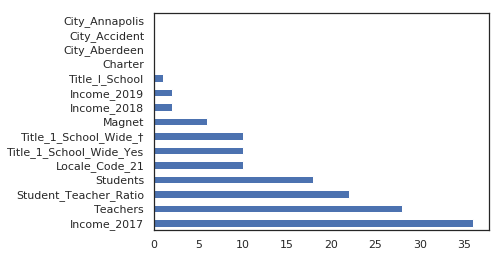

In [222]:
RMSE_full_features_percentage.append(split_and_train('Applications_1920_Submitted_Students_Perc_Apr19_2019'))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0297901	valid_0's l2: 0.0014199
[20]	valid_0's l1: 0.029263	valid_0's l2: 0.00136483
[30]	valid_0's l1: 0.0284283	valid_0's l2: 0.00130148
[40]	valid_0's l1: 0.0287152	valid_0's l2: 0.00132204
[50]	valid_0's l1: 0.0281697	valid_0's l2: 0.0012884
[60]	valid_0's l1: 0.028526	valid_0's l2: 0.00132974
[70]	valid_0's l1: 0.0287865	valid_0's l2: 0.00135318
[80]	valid_0's l1: 0.0287105	valid_0's l2: 0.00135795
[90]	valid_0's l1: 0.0289325	valid_0's l2: 0.00137301
[100]	valid_0's l1: 0.0290212	valid_0's l2: 0.00139372
[110]	valid_0's l1: 0.0292379	valid_0's l2: 0.00143448
[120]	valid_0's l1: 0.0294316	valid_0's l2: 0.00144516
[130]	valid_0's l1: 0.0293666	valid_0's l2: 0.00146352
[140]	valid_0's l1: 0.0291359	valid_0's l2: 0.00145996
[150]	valid_0's l1: 0.0295475	valid_0's l2: 0.00148537
Early stopping, best iteration is:
[50]	valid_0's l1: 0.0281697	valid_0's l2

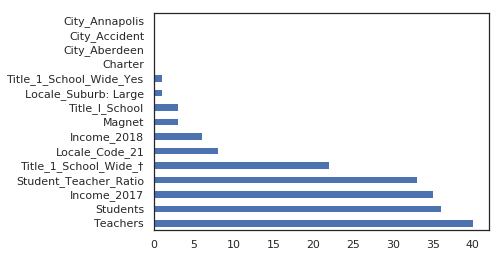

In [223]:
RMSE_full_features_percentage.append(split_and_train('Applications_1819_Submitted_Students_Perc_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0303657	valid_0's l2: 0.00167252
[20]	valid_0's l1: 0.0288408	valid_0's l2: 0.0014816
[30]	valid_0's l1: 0.0281925	valid_0's l2: 0.00141569
[40]	valid_0's l1: 0.0277658	valid_0's l2: 0.00138086
[50]	valid_0's l1: 0.0274859	valid_0's l2: 0.00136061
[60]	valid_0's l1: 0.027259	valid_0's l2: 0.001347
[70]	valid_0's l1: 0.0273789	valid_0's l2: 0.00135067
[80]	valid_0's l1: 0.0272236	valid_0's l2: 0.00133377
[90]	valid_0's l1: 0.0273324	valid_0's l2: 0.0013292
[100]	valid_0's l1: 0.0275578	valid_0's l2: 0.00132798
[110]	valid_0's l1: 0.0275423	valid_0's l2: 0.00130516
[120]	valid_0's l1: 0.0278828	valid_0's l2: 0.00130952
[130]	valid_0's l1: 0.0277616	valid_0's l2: 0.00130458
[140]	valid_0's l1: 0.0279158	valid_0's l2: 0.00131681
[150]	valid_0's l1: 0.0281312	valid_0's l2: 0.00132428
[160]	valid_0's l1: 0.0281835	valid_0's l2: 0.00132882
[170]	valid_0's l1: 0.

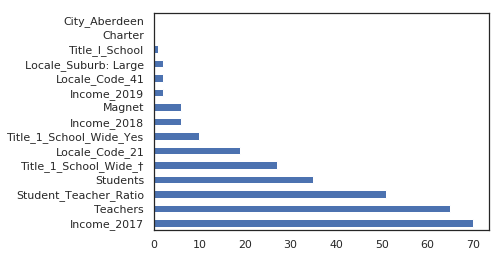

In [224]:
RMSE_full_features_percentage.append(split_and_train('Applications_1920_Complete_Students_Perc_Apr19_2019'))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0303706	valid_0's l2: 0.00144302
[20]	valid_0's l1: 0.0291905	valid_0's l2: 0.00133708
[30]	valid_0's l1: 0.0279303	valid_0's l2: 0.00124281
[40]	valid_0's l1: 0.0278262	valid_0's l2: 0.00123048
[50]	valid_0's l1: 0.0270676	valid_0's l2: 0.00118728
[60]	valid_0's l1: 0.0274079	valid_0's l2: 0.00120618
[70]	valid_0's l1: 0.0276895	valid_0's l2: 0.00122049
[80]	valid_0's l1: 0.0273922	valid_0's l2: 0.00122005
[90]	valid_0's l1: 0.0275773	valid_0's l2: 0.0012242
[100]	valid_0's l1: 0.0279783	valid_0's l2: 0.00124667
[110]	valid_0's l1: 0.0284153	valid_0's l2: 0.00127759
[120]	valid_0's l1: 0.0284538	valid_0's l2: 0.00127278
[130]	valid_0's l1: 0.0285884	valid_0's l2: 0.00128459
[140]	valid_0's l1: 0.0285814	valid_0's l2: 0.00128364
[150]	valid_0's l1: 0.0287536	valid_0's l2: 0.0012929
Early stopping, best iteration is:
[50]	valid_0's l1: 0.0270676	valid_0's 

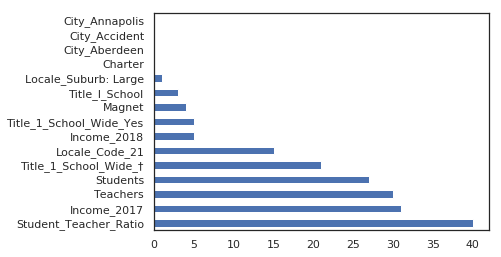

In [225]:
RMSE_full_features_percentage.append(split_and_train('Applications_1819_Complete_Students_Perc_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

In [226]:
sum(RMSE_full_features_percentage) / len(RMSE_full_features_percentage)

0.035623787432527

Looks like it's actually pretty accurate considering how low the RMSE is. The average RMSE error is about 3.56% which is pretty good considering that's within one standard deviation of the mean for all the statistics we described above for percentage. Now lets try it with only the good features.

#### Good features

In [0]:
RMSE_top_features_percentage = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0292077	valid_0's l2: 0.00148357
[20]	valid_0's l1: 0.0277373	valid_0's l2: 0.0013263
[30]	valid_0's l1: 0.0271542	valid_0's l2: 0.00127926
[40]	valid_0's l1: 0.0271059	valid_0's l2: 0.00126487
[50]	valid_0's l1: 0.027157	valid_0's l2: 0.00127327
[60]	valid_0's l1: 0.0270928	valid_0's l2: 0.00127018
[70]	valid_0's l1: 0.0274248	valid_0's l2: 0.00130126
[80]	valid_0's l1: 0.027582	valid_0's l2: 0.00130982
[90]	valid_0's l1: 0.0278562	valid_0's l2: 0.00132349
[100]	valid_0's l1: 0.0279801	valid_0's l2: 0.00132644
[110]	valid_0's l1: 0.0278095	valid_0's l2: 0.00130979
[120]	valid_0's l1: 0.0281272	valid_0's l2: 0.00132134
[130]	valid_0's l1: 0.02816	valid_0's l2: 0.00132185
Early stopping, best iteration is:
[38]	valid_0's l1: 0.0269491	valid_0's l2: 0.00126166
Saving model...
Starting predicting...
The rmse of prediction is: 0.035519825481825244
Done! Print

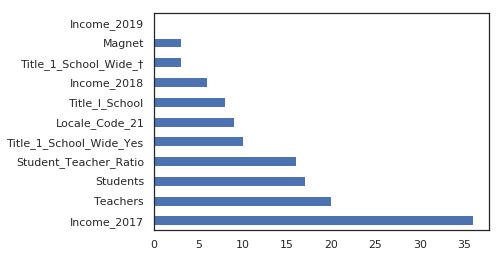

In [228]:
RMSE_top_features_percentage.append(split_and_train('Applications_1920_Submitted_Students_Perc_Apr19_2019', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Income_2019', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet']))

So, not much improvement, still within one std. deviation and only a slight (`.0002`) improvement by only using the important features. Weird that `Income_2019` dropped to being very unimportant, though I expected `Charter` not to mean much. Still weird that `Locale_Code_21` was **so** important. It makes me really wonder what it represents.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0298846	valid_0's l2: 0.00142312
[20]	valid_0's l1: 0.0292258	valid_0's l2: 0.00136184
[30]	valid_0's l1: 0.0282892	valid_0's l2: 0.00129045
[40]	valid_0's l1: 0.0284858	valid_0's l2: 0.00129833
[50]	valid_0's l1: 0.0279043	valid_0's l2: 0.00127095
[60]	valid_0's l1: 0.0282867	valid_0's l2: 0.00131384
[70]	valid_0's l1: 0.0284851	valid_0's l2: 0.00133503
[80]	valid_0's l1: 0.0283589	valid_0's l2: 0.00133445
[90]	valid_0's l1: 0.0286787	valid_0's l2: 0.00136124
[100]	valid_0's l1: 0.0287972	valid_0's l2: 0.00138508
[110]	valid_0's l1: 0.0287576	valid_0's l2: 0.00140358
[120]	valid_0's l1: 0.0290614	valid_0's l2: 0.001426
[130]	valid_0's l1: 0.0290508	valid_0's l2: 0.0014506
[140]	valid_0's l1: 0.0288347	valid_0's l2: 0.00144423
[150]	valid_0's l1: 0.0292715	valid_0's l2: 0.0014772
Early stopping, best iteration is:
[50]	valid_0's l1: 0.0279043	valid_0's l2

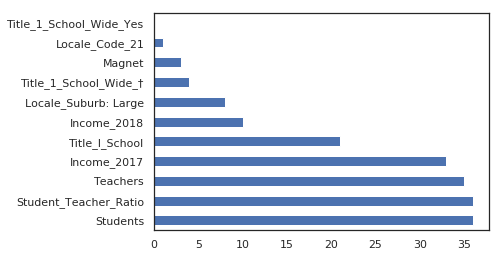

In [229]:
RMSE_top_features_percentage.append(split_and_train('Applications_1819_Submitted_Students_Perc_Apr19_2018', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Suburb: Large',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet']))

This percentage model also got a small boost from only using important features, as we'd expect it to do so. Around the same gain as the previous one. Nothing terribly unexpected in the feature importances.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0304211	valid_0's l2: 0.00167535
[20]	valid_0's l1: 0.0288455	valid_0's l2: 0.00147563
[30]	valid_0's l1: 0.0283949	valid_0's l2: 0.00141757
[40]	valid_0's l1: 0.0278632	valid_0's l2: 0.00137903
[50]	valid_0's l1: 0.0277682	valid_0's l2: 0.00136823
[60]	valid_0's l1: 0.0275822	valid_0's l2: 0.00135036
[70]	valid_0's l1: 0.0276827	valid_0's l2: 0.00135707
[80]	valid_0's l1: 0.027448	valid_0's l2: 0.00135092
[90]	valid_0's l1: 0.0276172	valid_0's l2: 0.0013481
[100]	valid_0's l1: 0.0276139	valid_0's l2: 0.00134086
[110]	valid_0's l1: 0.0275894	valid_0's l2: 0.00131954
[120]	valid_0's l1: 0.0278758	valid_0's l2: 0.00131909
[130]	valid_0's l1: 0.0277212	valid_0's l2: 0.00131224
[140]	valid_0's l1: 0.0278348	valid_0's l2: 0.00131976
[150]	valid_0's l1: 0.027883	valid_0's l2: 0.00132963
[160]	valid_0's l1: 0.0279015	valid_0's l2: 0.00132681
[170]	valid_0's l1: 

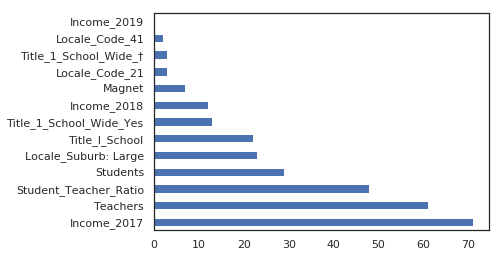

In [230]:
RMSE_top_features_percentage.append(split_and_train('Applications_1920_Complete_Students_Perc_Apr19_2019', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Suburb: Large',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet', 
                                                                                    'Income_2019',
                                                                                    'Locale_Code_41']))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 0.0303577	valid_0's l2: 0.00145389
[20]	valid_0's l1: 0.0291175	valid_0's l2: 0.00133888
[30]	valid_0's l1: 0.0281545	valid_0's l2: 0.00126243
[40]	valid_0's l1: 0.0280226	valid_0's l2: 0.00124344
[50]	valid_0's l1: 0.027254	valid_0's l2: 0.0011964
[60]	valid_0's l1: 0.0274197	valid_0's l2: 0.00120786
[70]	valid_0's l1: 0.0274388	valid_0's l2: 0.00121085
[80]	valid_0's l1: 0.0272169	valid_0's l2: 0.00120618
[90]	valid_0's l1: 0.0273877	valid_0's l2: 0.00121101
[100]	valid_0's l1: 0.0278047	valid_0's l2: 0.00123324
[110]	valid_0's l1: 0.0281244	valid_0's l2: 0.00126061
[120]	valid_0's l1: 0.0282352	valid_0's l2: 0.00125671
[130]	valid_0's l1: 0.0282883	valid_0's l2: 0.00126564
[140]	valid_0's l1: 0.0284157	valid_0's l2: 0.0012738
[150]	valid_0's l1: 0.0286605	valid_0's l2: 0.0012835
[160]	valid_0's l1: 0.028856	valid_0's l2: 0.00128781
[170]	valid_0's l1: 0.

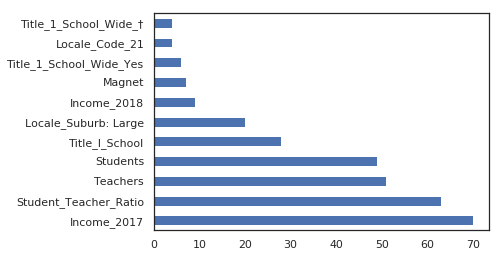

In [233]:
RMSE_top_features_percentage.append(split_and_train('Applications_1819_Complete_Students_Perc_Apr19_2018', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Suburb: Large',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet']))

In [234]:
sum(RMSE_top_features_percentage)/len(RMSE_top_features_percentage)

0.03558226554478634

Slight improvement overall on the average RMSE for the percentage ones. Now we're going to try the raw numbers.

### Raw Numbers

I expect for the raw numbers, the column `Students` will be one of the most important for every run, as the algorithm not only has to predict how many students will interact with the FAFSA but also how many students the school has as a whole. It's also possible because of that it will care about the `Grades` feature, which was one I engineered by subtracting `Low_Grade` from `High_Grade`.

#### All Features

In [0]:
RMSE_full_features_raw = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 58.9318	valid_0's l2: 4520.25
[20]	valid_0's l1: 42.488	valid_0's l2: 2521.79
[30]	valid_0's l1: 34.6099	valid_0's l2: 1825.4
[40]	valid_0's l1: 30.2351	valid_0's l2: 1481.26
[50]	valid_0's l1: 28.6881	valid_0's l2: 1352.67
[60]	valid_0's l1: 29.1473	valid_0's l2: 1325.36
[70]	valid_0's l1: 28.8134	valid_0's l2: 1269.47
[80]	valid_0's l1: 28.3981	valid_0's l2: 1234.97
[90]	valid_0's l1: 28.2706	valid_0's l2: 1239.86
[100]	valid_0's l1: 28.1241	valid_0's l2: 1229.24
[110]	valid_0's l1: 28.463	valid_0's l2: 1251.87
[120]	valid_0's l1: 28.4259	valid_0's l2: 1260.48
[130]	valid_0's l1: 28.2491	valid_0's l2: 1251.69
[140]	valid_0's l1: 28.0605	valid_0's l2: 1243.84
[150]	valid_0's l1: 28.099	valid_0's l2: 1246.87
[160]	valid_0's l1: 27.9293	valid_0's l2: 1231.09
[170]	valid_0's l1: 28.0122	valid_0's l2: 1236.94
[180]	valid_0's l1: 27.8441	valid_0's l2: 1239.6
[1

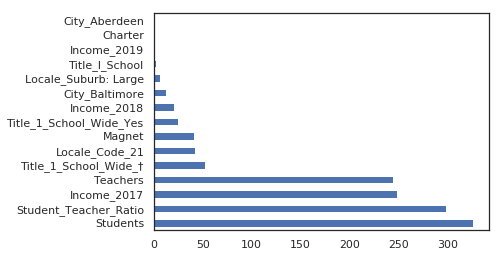

In [244]:
RMSE_full_features_raw.append(split_and_train('Applications_1920_Submitted_Apr19_2019'))

A RMSE of 34.38 is actually pretty good considering the standard deviation for this data is in the 90's. As I predicted, the 

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 57.5279	valid_0's l2: 4314.56
[20]	valid_0's l1: 41.8272	valid_0's l2: 2440.51
[30]	valid_0's l1: 34.1042	valid_0's l2: 1762.13
[40]	valid_0's l1: 30.0908	valid_0's l2: 1443.18
[50]	valid_0's l1: 28.4316	valid_0's l2: 1301.5
[60]	valid_0's l1: 28.9644	valid_0's l2: 1286.29
[70]	valid_0's l1: 28.4085	valid_0's l2: 1224.05
[80]	valid_0's l1: 28.0112	valid_0's l2: 1184.51
[90]	valid_0's l1: 27.7351	valid_0's l2: 1181.66
[100]	valid_0's l1: 27.3773	valid_0's l2: 1165.51
[110]	valid_0's l1: 27.7943	valid_0's l2: 1189
[120]	valid_0's l1: 27.6051	valid_0's l2: 1186.26
[130]	valid_0's l1: 27.3978	valid_0's l2: 1174.14
[140]	valid_0's l1: 27.2505	valid_0's l2: 1169.77
[150]	valid_0's l1: 27.1712	valid_0's l2: 1168.39
[160]	valid_0's l1: 27.0596	valid_0's l2: 1155.85
[170]	valid_0's l1: 27.1862	valid_0's l2: 1162.57
[180]	valid_0's l1: 27.0691	valid_0's l2: 1168.72
[

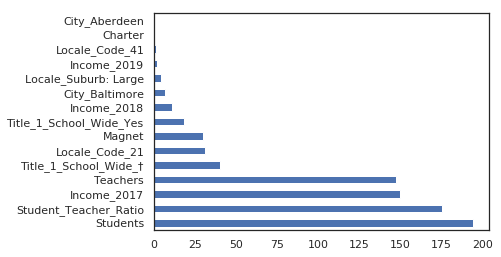

In [245]:
RMSE_full_features_raw.append(split_and_train('Applications_1920_Complete_Apr19_2019'))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 57.2567	valid_0's l2: 4579.08
[20]	valid_0's l1: 44.1277	valid_0's l2: 2757.72
[30]	valid_0's l1: 36.5685	valid_0's l2: 2003.45
[40]	valid_0's l1: 32.4287	valid_0's l2: 1641.17
[50]	valid_0's l1: 30.4283	valid_0's l2: 1488.26
[60]	valid_0's l1: 29.7887	valid_0's l2: 1449.58
[70]	valid_0's l1: 29.2866	valid_0's l2: 1389.93
[80]	valid_0's l1: 28.8915	valid_0's l2: 1336.52
[90]	valid_0's l1: 29.1418	valid_0's l2: 1347.97
[100]	valid_0's l1: 29.0638	valid_0's l2: 1343.66
[110]	valid_0's l1: 28.9657	valid_0's l2: 1347.53
[120]	valid_0's l1: 28.9405	valid_0's l2: 1345.43
[130]	valid_0's l1: 28.8807	valid_0's l2: 1350.59
[140]	valid_0's l1: 28.743	valid_0's l2: 1350.09
[150]	valid_0's l1: 28.7567	valid_0's l2: 1366.12
[160]	valid_0's l1: 28.8357	valid_0's l2: 1377.5
[170]	valid_0's l1: 28.8438	valid_0's l2: 1377.73
[180]	valid_0's l1: 28.8939	valid_0's l2: 1381.15

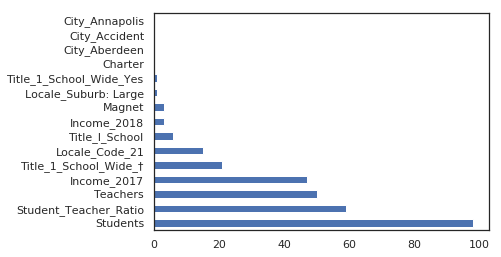

In [246]:
RMSE_full_features_raw.append(split_and_train('Applications_1819_Submitted_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 55.6756	valid_0's l2: 4219.5
[20]	valid_0's l1: 42.8382	valid_0's l2: 2549.97
[30]	valid_0's l1: 35.8192	valid_0's l2: 1872.31
[40]	valid_0's l1: 32.259	valid_0's l2: 1560.64
[50]	valid_0's l1: 30.4768	valid_0's l2: 1431.15
[60]	valid_0's l1: 29.6881	valid_0's l2: 1398.29
[70]	valid_0's l1: 28.9871	valid_0's l2: 1341.77
[80]	valid_0's l1: 28.3582	valid_0's l2: 1272.61
[90]	valid_0's l1: 28.4415	valid_0's l2: 1280.34
[100]	valid_0's l1: 28.356	valid_0's l2: 1276.73
[110]	valid_0's l1: 28.3643	valid_0's l2: 1281.91
[120]	valid_0's l1: 28.3843	valid_0's l2: 1287.31
[130]	valid_0's l1: 28.307	valid_0's l2: 1288.64
[140]	valid_0's l1: 28.2408	valid_0's l2: 1291.22
[150]	valid_0's l1: 28.2394	valid_0's l2: 1305.47
[160]	valid_0's l1: 28.333	valid_0's l2: 1318.77
[170]	valid_0's l1: 28.3903	valid_0's l2: 1335.62
[180]	valid_0's l1: 28.5113	valid_0's l2: 1337.36
Ea

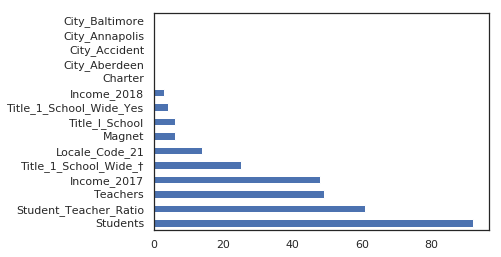

In [247]:
RMSE_full_features_raw.append(split_and_train('Applications_1819_Complete_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

Weird that `Locale_Suburb: Large` dropped off the features on this experiment. It's not terribly different than all the others so I'd expect it to show up here.

In [248]:
sum(RMSE_full_features_raw) / len(RMSE_full_features_raw)

35.02188056911061

So `35.02188` isn't bad considering the standard deviation of most of the data is in the 90's. Now lets limit it to the top features and see if we can get an improvement. We probably will see at least **some** improvement, considering that's usually the case with boosting.

Also noteworthy is that the top feature of each model was students, as I predicted it might be.

#### Top Features

In [0]:
RMSE_top_features_raw = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 58.1903	valid_0's l2: 4420.59
[20]	valid_0's l1: 41.9975	valid_0's l2: 2495.15
[30]	valid_0's l1: 33.8471	valid_0's l2: 1763.09
[40]	valid_0's l1: 30.0159	valid_0's l2: 1461.19
[50]	valid_0's l1: 28.4889	valid_0's l2: 1326.08
[60]	valid_0's l1: 29.0223	valid_0's l2: 1314.37
[70]	valid_0's l1: 28.7536	valid_0's l2: 1267.12
[80]	valid_0's l1: 28.3306	valid_0's l2: 1232.85
[90]	valid_0's l1: 28.3209	valid_0's l2: 1239
[100]	valid_0's l1: 28.3131	valid_0's l2: 1235.55
[110]	valid_0's l1: 28.6517	valid_0's l2: 1260.27
[120]	valid_0's l1: 28.5224	valid_0's l2: 1259.85
[130]	valid_0's l1: 28.2509	valid_0's l2: 1251.79
[140]	valid_0's l1: 28.334	valid_0's l2: 1250.06
[150]	valid_0's l1: 28.38	valid_0's l2: 1254.61
[160]	valid_0's l1: 28.0815	valid_0's l2: 1230.14
[170]	valid_0's l1: 28.1819	valid_0's l2: 1238.57
[180]	valid_0's l1: 28.0265	valid_0's l2: 1240.63
[19

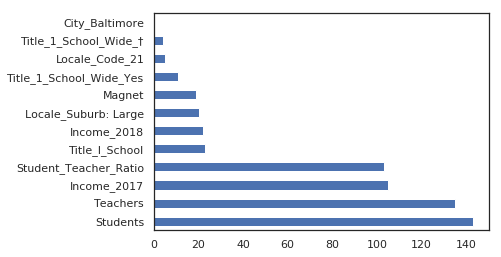

In [255]:
RMSE_top_features_raw.append(split_and_train('Applications_1920_Submitted_Apr19_2019', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Suburb: Large',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet',
                                                                                                    'City_Baltimore']))

Wow. I'm very surprised that `City_Baltimore` completely dropped off the map when we only used the top features, while `Locale_Suburb: Large` gained a couple of spots in the top features. This actually did slightly worse that the all features, though is still within the same ballpark.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 57.0732	valid_0's l2: 4237.12
[20]	valid_0's l1: 41.8628	valid_0's l2: 2431.94
[30]	valid_0's l1: 34.2277	valid_0's l2: 1762.44
[40]	valid_0's l1: 30.0921	valid_0's l2: 1443.69
[50]	valid_0's l1: 28.6259	valid_0's l2: 1314.93
[60]	valid_0's l1: 29.3054	valid_0's l2: 1313.09
[70]	valid_0's l1: 28.8548	valid_0's l2: 1263.49
[80]	valid_0's l1: 28.5094	valid_0's l2: 1226.53
[90]	valid_0's l1: 28.3285	valid_0's l2: 1224.13
[100]	valid_0's l1: 27.745	valid_0's l2: 1195.9
[110]	valid_0's l1: 28.0755	valid_0's l2: 1214.99
[120]	valid_0's l1: 27.9399	valid_0's l2: 1212.19
[130]	valid_0's l1: 27.8594	valid_0's l2: 1198.13
[140]	valid_0's l1: 27.719	valid_0's l2: 1191.8
[150]	valid_0's l1: 27.7314	valid_0's l2: 1196.02
[160]	valid_0's l1: 27.5119	valid_0's l2: 1176.73
[170]	valid_0's l1: 27.6642	valid_0's l2: 1188
[180]	valid_0's l1: 27.542	valid_0's l2: 1192.65
[190]

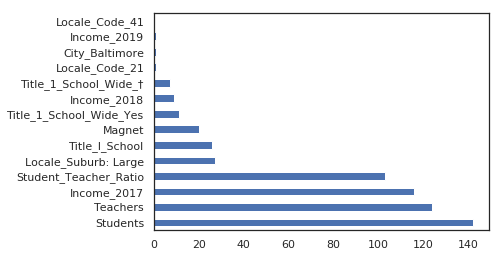

In [256]:
RMSE_top_features_raw.append(split_and_train('Applications_1920_Complete_Apr19_2019', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Suburb: Large',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet',
                                                                                                    'City_Baltimore',
                                                                                                    'Locale_Code_41',
                                                                                                    'Income_2019']))

Not unexpected to see the `Locale_Code_41` drop off the top features list when we limit the number of features. Though it is quite weird to see `Locale_Code_21`, which was rather high previously drop all the way down.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 57.8247	valid_0's l2: 4609.7
[20]	valid_0's l1: 44.3072	valid_0's l2: 2745.56
[30]	valid_0's l1: 36.8609	valid_0's l2: 2003
[40]	valid_0's l1: 32.7509	valid_0's l2: 1650.72
[50]	valid_0's l1: 30.7918	valid_0's l2: 1508.45
[60]	valid_0's l1: 30.0498	valid_0's l2: 1467.6
[70]	valid_0's l1: 29.4469	valid_0's l2: 1404.65
[80]	valid_0's l1: 28.9456	valid_0's l2: 1337.57
[90]	valid_0's l1: 29.0821	valid_0's l2: 1342.66
[100]	valid_0's l1: 28.9868	valid_0's l2: 1335.58
[110]	valid_0's l1: 28.898	valid_0's l2: 1335.81
[120]	valid_0's l1: 28.7583	valid_0's l2: 1330.96
[130]	valid_0's l1: 28.7886	valid_0's l2: 1345.91
[140]	valid_0's l1: 28.6298	valid_0's l2: 1340.61
[150]	valid_0's l1: 28.7141	valid_0's l2: 1359.13
[160]	valid_0's l1: 28.7805	valid_0's l2: 1367.21
[170]	valid_0's l1: 28.7963	valid_0's l2: 1367.49
[180]	valid_0's l1: 28.9608	valid_0's l2: 1380.8
[190

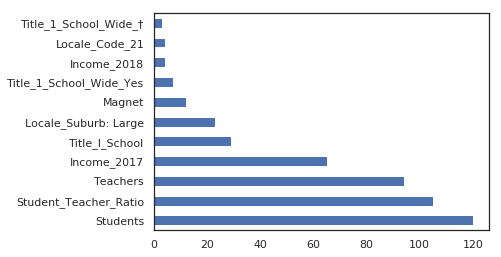

In [257]:
RMSE_top_features_raw.append(split_and_train('Applications_1819_Submitted_Apr19_2018', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Suburb: Large',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet']))

Weird seeing `Title_1_School_Wide_Cross` drop so low from where it was above.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 55.8155	valid_0's l2: 4263.66
[20]	valid_0's l1: 42.8594	valid_0's l2: 2533.15
[30]	valid_0's l1: 35.9931	valid_0's l2: 1880.09
[40]	valid_0's l1: 32.3859	valid_0's l2: 1569.03
[50]	valid_0's l1: 30.6073	valid_0's l2: 1433.68
[60]	valid_0's l1: 29.5716	valid_0's l2: 1376.42
[70]	valid_0's l1: 29.0503	valid_0's l2: 1332.66
[80]	valid_0's l1: 28.5649	valid_0's l2: 1272.59
[90]	valid_0's l1: 28.611	valid_0's l2: 1285.07
[100]	valid_0's l1: 28.5686	valid_0's l2: 1286.39
[110]	valid_0's l1: 28.5451	valid_0's l2: 1284.09
[120]	valid_0's l1: 28.5826	valid_0's l2: 1281.29
[130]	valid_0's l1: 28.5475	valid_0's l2: 1287.74
[140]	valid_0's l1: 28.4838	valid_0's l2: 1287.5
[150]	valid_0's l1: 28.4512	valid_0's l2: 1302.27
[160]	valid_0's l1: 28.4154	valid_0's l2: 1305.62
[170]	valid_0's l1: 28.5669	valid_0's l2: 1324.61
[180]	valid_0's l1: 28.7264	valid_0's l2: 1333.08

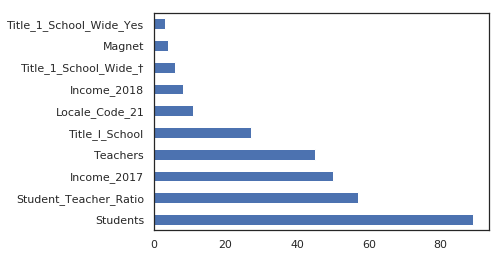

In [259]:
RMSE_top_features_raw.append(split_and_train('Applications_1819_Complete_Apr19_2018', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet']))

In [260]:
sum(RMSE_top_features_raw)/len(RMSE_top_features_raw)

35.300071249051314

**Wow!** Very surprising to see that the average root mean squared error went up in the better features. That's atypical of most boosting models.